In [1]:
#LIBRERÍAS NECESARIAS
library("FNN")
library("MASS")
library("stats")
library("readr")
library("caret")
library("e1071")
library("mclust")
library("sparcl")
library("kohonen")
library("cluster")
library("fields")
library(tree)
library(class)
library(randomForest)
library(tsne)
library(Rtsne)


Warning message:
"package 'FNN' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'kohonen' was built under R version 3.5.3"
Attaching package: 'kohonen'

The following object is masked from 'package:mclust':

    map

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

The f

# · Creación del dataset

In [2]:
corazon=read.csv('corazon_r2.csv', header = TRUE, sep = ',')
corazon=corazon[,-1]
bazo=read.csv('bazo_r2.csv',header=TRUE)
bazo=bazo[,-1]
glandula=read.csv('glandula_r2.csv',header=TRUE)
glandula=glandula[,-1]
timo=read.csv('timo_r2.csv', header = TRUE, sep = ',')
timo=timo[,-1]
pulmon=read.csv('pulmon_r2.csv',header=TRUE)
pulmon=pulmon[,-1]
rinon=read.csv('riñon_r2.csv',header=TRUE)
rinon=rinon[,-1]
medula=read.csv('medula_r2.csv', header = TRUE, sep = ',')
medula=medula[,-1]
vejiga=read.csv('vejiga_r2.csv',header=TRUE)
vejiga=vejiga[,-1]
higado=read.csv('higado_r2.csv',header=TRUE)
higado=higado[,-1]

df=rbind(corazon,bazo,glandula,timo,pulmon,rinon,medula,vejiga,higado)
dim(df)

[1]  3600 23434

### Separación en train y test

In [3]:
y=df$etiqueta
x=df[,-ncol(df)]

In [4]:
set.seed(2)
indtrain = sample(1:3600, round(0.75*3600))
indtest = setdiff(1:3600, indtrain)
df.occ=data.frame(y, x)
df.train=df.occ[indtrain,]
df.test=df.occ[indtest,]

# · Clasificación con todos los datos

### KNN (dura mucho tiempo)

In [7]:
## predicción sobre test con k=1
predd=knn(df.train[,-1],df.test[,-1],df.train$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test$y))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 103   1   1   0   0   5   1   0   0
         2   1  87   1   2   3   5   4   0   2
         3   0   0  87   0   2   0   0   3   1
         4   0   0   0  98   0   0   0   0   0
         5   0   3   0   0  99   0   0   0   1
         6   0   3   3   1   0  93   0   6   0
         7   0   2   1   0   0   1  91   0   1
         8   0   1   2   0   2   1   0  87   0
         9   0   0   0   0   0   0   0   0  95

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.915, 0.9487)
    No Information Rate : 0.1178         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.925          
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            

# · Segmentación con todos los datos

### K-means

In [5]:
kmModel<-kmeans(df[,-ncol(df)],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster        3600 -none- numeric
centers      210897 -none- numeric
totss             1 -none- numeric
withinss          9 -none- numeric
tot.withinss      1 -none- numeric
betweenss         1 -none- numeric
size              9 -none- numeric
iter              1 -none- numeric
ifault            1 -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0 376   0   0   0   0  24   0
         2   0   0  25   2   0   2  18 349   4
         3   0   0 303   7   0   0   0  90   0
         4   0   0   0   1 374   0   0  24   1
         5  90   0 185   0   0  50  69   6   0
         6   0   0 264   3   0   0   0 133   0
         7   0   0  34  13   0   0   0 218 135
         8   0   0 178   0   0 211   1  10   0
         9   0 232  11 152   0   0   0   4   1

Overall Statistics
                                          
               Accuracy : 0.0875          
                 95% CI : (0.0785, 0.0972)
    No Information Rate : 0.3822          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0266         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3  Class: 4 Class: 5 Class: 6
Sensitivity   

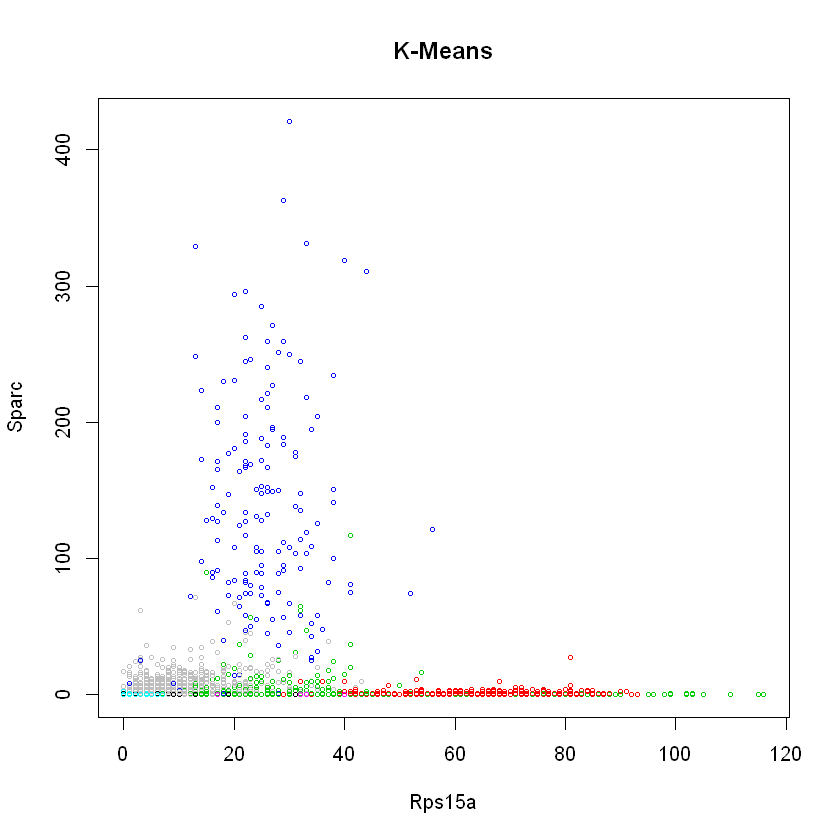

In [23]:
a=df['Rps15a']
b=df['Sparc']
plot(a[,],b[,],col=kmModel$cluster,main="K-Means", cex=0.5, xlab="Rps15a", ylab="Sparc") 

### t-sne y Rt-sne

sigma summary: Min. : 0.257335433295091 |1st Qu. : 0.432608845623452 |Median : 0.504952088452072 |Mean : 0.538003953008405 |3rd Qu. : 0.605817051798945 |Max. : 1.81962440544405 |
Epoch: Iteration #100 error is: 17.0641191693973
Epoch: Iteration #200 error is: 1.42365346999279
Epoch: Iteration #300 error is: 1.22518673543829
Epoch: Iteration #400 error is: 1.14187938791506
Epoch: Iteration #500 error is: 1.1084490087906
Epoch: Iteration #600 error is: 1.09039730948868
Epoch: Iteration #700 error is: 1.0791938682636
Epoch: Iteration #800 error is: 1.07162248265473
Epoch: Iteration #900 error is: 1.06619065220793
Epoch: Iteration #1000 error is: 1.06212263808116


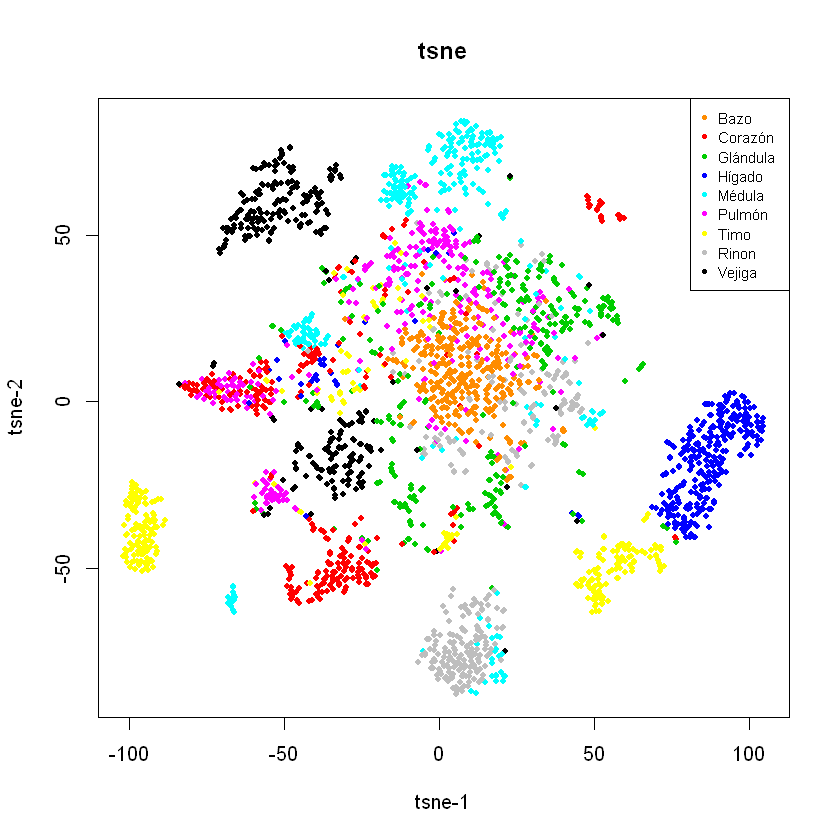

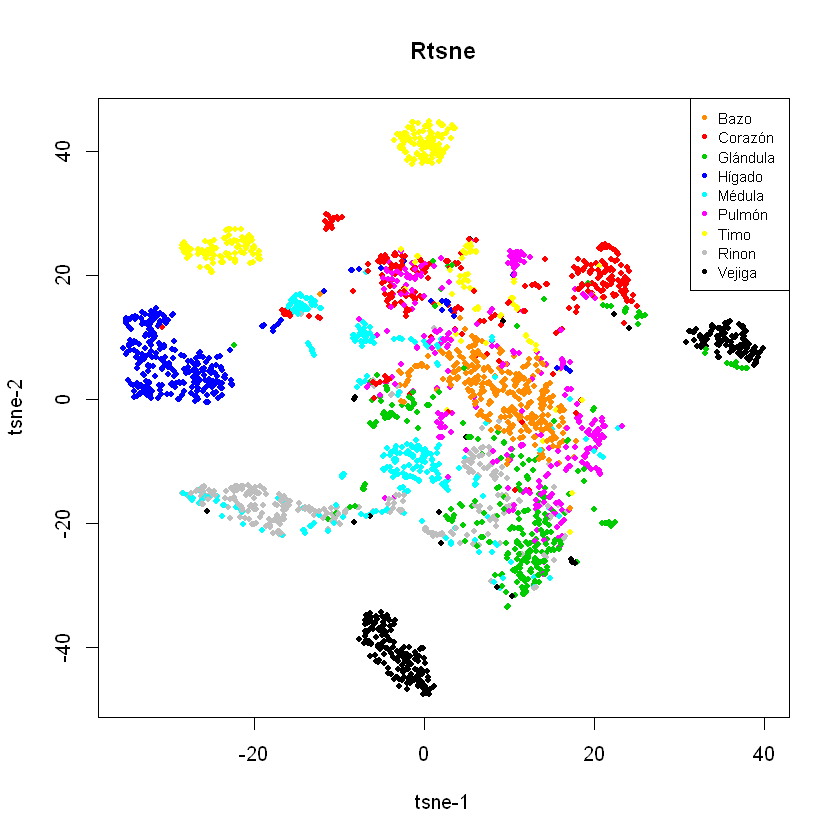

In [91]:
rtsne <- Rtsne(df.train[,2:1000],check_duplicates = FALSE)
tsne <- tsne(df.train[,2:1000])
colors=df.train$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [94]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0   0   3   0 279   1   0  26
         2   3   2   9  13 132   6 107   0  24
         3  12   8   8  16  45  58  23   0 136
         4   0 270   0   4   1   1  21   0   0
         5  26  11   3 180   0  14  45  16  13
         6   2   0   3 104  36  38  56   0  55
         7  66  63   2  10   6   6  29 114   0
         8 159   0   0   7   0  91   1   0  36
         9   2   1 171   4  84   4  32   0   2

Overall Statistics
                                         
               Accuracy : 0.0307         
                 95% CI : (0.0246, 0.038)
    No Information Rate : 0.1841         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : -0.0902        
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1  Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           

In [95]:
#rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  17   1   0 244  47   0   0   0   0
         2  10   2  20   9 118   0   0 113  24
         3  56 189   1  22  10   0   3  25   0
         4   0   0 278   4  15   0   0   0   0
         5 128  25  47  12  58   0  38   0   0
         6  29  46   0 100 114   0   0   5   0
         7   2   3 113  10  51   0   0   3 114
         8  47  68   1  13   1   0 164   0   0
         9   5   7   0   0   2 171   2 113   0

Overall Statistics
                                          
               Accuracy : 0.0304          
                 95% CI : (0.0242, 0.0376)
    No Information Rate : 0.1704          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0913         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2  Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity  

# · Correlación para quedarnos con las columnas (genes) importantes

Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), m

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

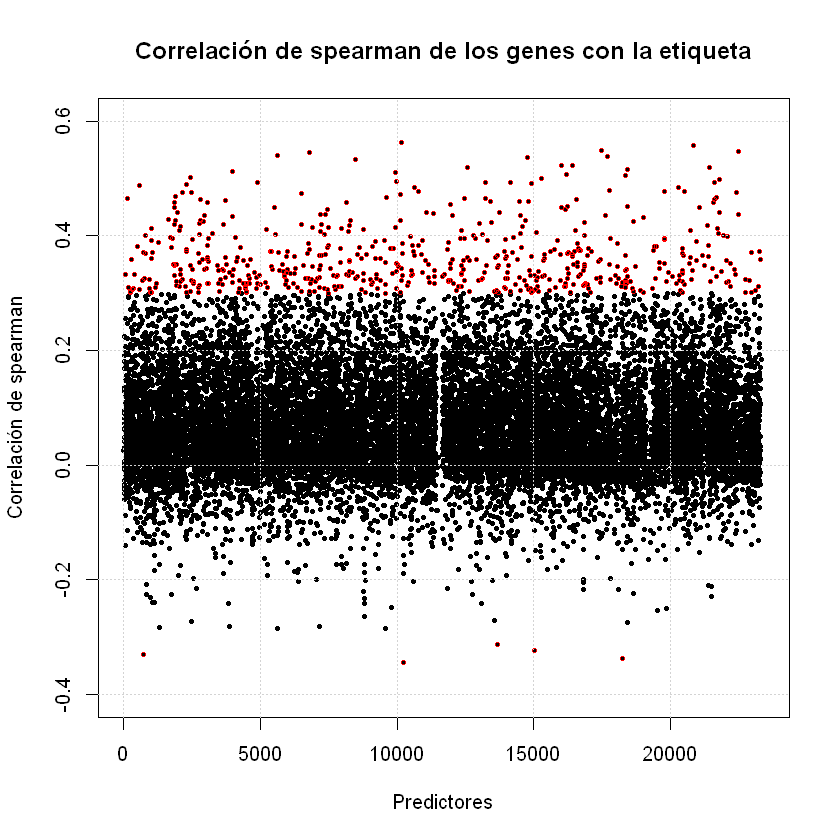

In [6]:
## correlación de spearman de cada gen con la etiqueta
r.xy = c()
for (ivar in 1:ncol(x)) {
  r.xy[ivar] = cor(as.numeric(y), as.integer((x[,ivar])), method = "spearman")
}
plot(r.xy, ylim = c(-0.4, 0.6), pch = 19, cex = 0.5, main="Correlación de spearman de los genes con la etiqueta", xlab = "Predictores", ylab = "Correlación de spearman")
grid()

ind.sele = which(abs(r.xy) > 0.3)
points(ind.sele, r.xy[ind.sele], col = "red", cex = 0.5)
#para eliminar predictores que no aportan ninguna informacion a nuestro problema (reducimos predictores)

In [7]:
length(ind.sele)

[1] 571

In [9]:
df.train2=df.train[,ind.sele]
df.test2=df.test[,ind.sele]
df.train2['y']=as.numeric(y[indtrain])
df.test2['y']=as.numeric(y[indtest])

# · Segmentación con índices seleccionados

### t-sne y Rt-sne

sigma summary: Min. : 0.264175397423445 |1st Qu. : 0.457612798533901 |Median : 0.522351632481874 |Mean : 0.547288967638425 |3rd Qu. : 0.603587702894718 |Max. : 1.4122955749734 |
Epoch: Iteration #100 error is: 17.8261712559294
Epoch: Iteration #200 error is: 1.50125194348957
Epoch: Iteration #300 error is: 1.30261248066352
Epoch: Iteration #400 error is: 1.21980687014291
Epoch: Iteration #500 error is: 1.18678358304608
Epoch: Iteration #600 error is: 1.16926516236941
Epoch: Iteration #700 error is: 1.158483457565
Epoch: Iteration #800 error is: 1.15133200646546
Epoch: Iteration #900 error is: 1.1462818634204
Epoch: Iteration #1000 error is: 1.14231534988667


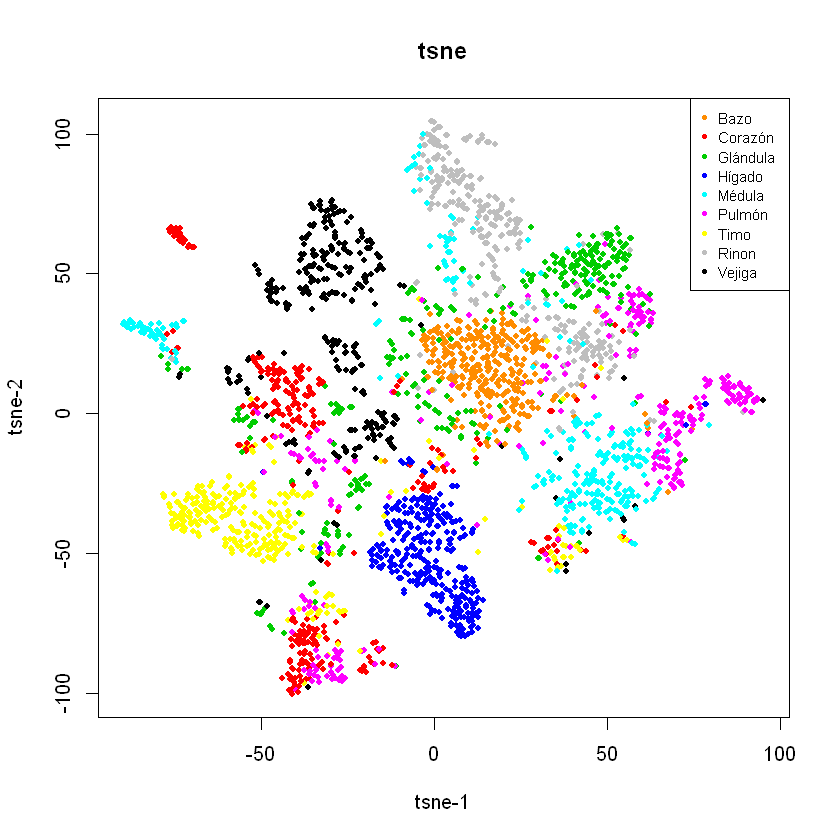

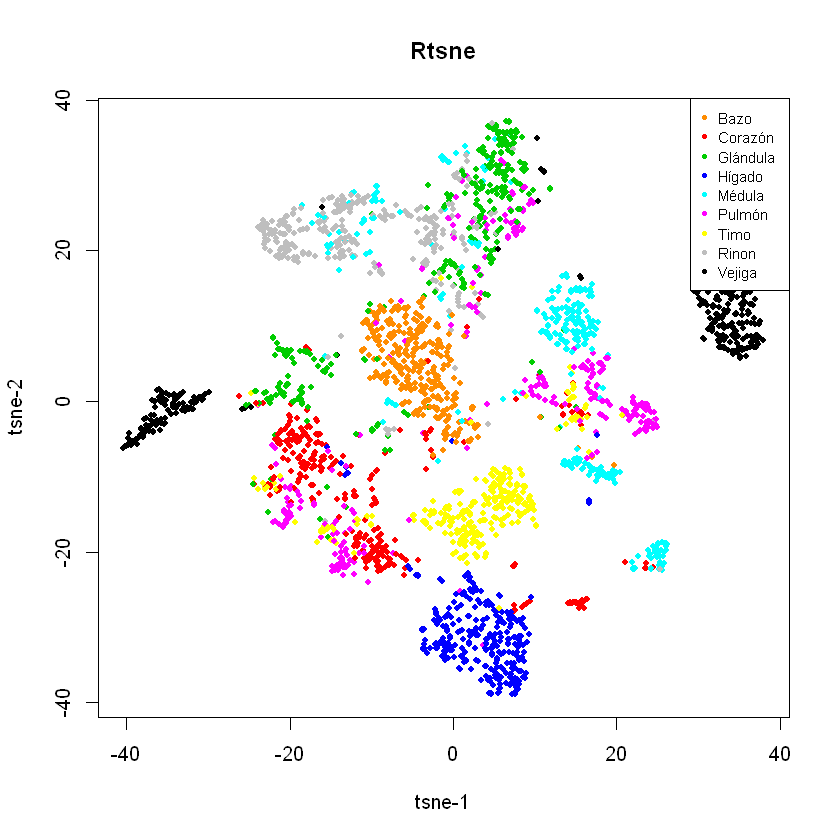

In [99]:
rtsne <- Rtsne(df.train2[,-ncol(df.train2)],check_duplicates = FALSE)
tsne <- tsne(df.train2[,-ncol(df.train2)])
colors=df.train2$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [100]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0 295   0   3   0   2   1   8
         2   9  95   9  37   4   0  31 103   8
         3  17  12  69   6 137  10  10  42   3
         4   3   0   0   0   0   0 287   3   4
         5   0   0   9  48  13  43   4   2 189
         6  12  49  14   0  56   1   5  27 130
         7 227  25   3   0   2   1  19   6  13
         8   0   0  19   1  87 181   0   0   6
         9   3   4   2 104   0  82   2  95   8

Overall Statistics
                                          
               Accuracy : 0.0759          
                 95% CI : (0.0662, 0.0866)
    No Information Rate : 0.1556          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0397         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5  Class: 6
Sensitivity   

In [101]:
#-rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0   3   0   1   0 304   0   1
         2   0   0  31  12 106   0  12 118  17
         3   0   1   0   0   6 193  27  73   6
         4   0   0   3 279  12   0   1   1   1
         5   0  36 103   0   1  24  13   0 131
         6   0   1   3   2  54  59  18  35 122
         7   0   0 122  18 115   2   1  12  26
         8   0 184   1   0   1  82  25   0   1
         9 171   1   0   0   0   6   1 119   2

Overall Statistics
                                          
               Accuracy : 0.1267          
                 95% CI : (0.1143, 0.1398)
    No Information Rate : 0.1489          
    P-Value [Acc > NIR] : 0.9996          
                                          
                  Kappa : 0.0178          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4  Class: 5 Class: 6
Sensitivity   

### K-means 

In [104]:
kmModel<-kmeans(df[,ind.sele],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster      3600   -none- numeric
centers      5139   -none- numeric
totss           1   -none- numeric
withinss        9   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            9   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0   0   0   0   0   1 399   0   0
         2  35  35   0   0   0  20 300   0  10
         3   0  97   1   0   0 274  19   1   8
         4   0   0   0   0   7   0 393   0   0
         5   0 175   0   0   0  44 131  47   3
         6   0  58   0   0   0 101 193   0  48
         7 134  29   0   0 139   2  92   0   4
         8   0   0   0   0   0 188   6 205   1
         9   0  15 136 233   0   2   0   1  13

Overall Statistics
                                          
               Accuracy : 0.1242          
                 95% CI : (0.1136, 0.1354)
    No Information Rate : 0.4258          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0147          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2  Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity   

# · Clasificación con índices seleccionados

### GLMs

In [11]:
# #GLM
# df.train$y=as.numeric(as.character(df.train$y))
# df.test$y=as.numeric(as.character(df.test$y))

numeros2<-function(n){
    df.train2$y[which(df.train2$y != n)] <- 0 ; df.train2$y[which(df.train2$y == n)] <- 1
    df.test$y[which(df.test2$y != n)] <- 0 ; df.test$y[which(df.test2$y == n)] <- 1
    DatT <- df.train2;
    Datt<- df.test2;
    M <- glm(y~., data = DatT[,], family = binomial(link = "logit"))
    Out <- M$fitted.values
    Outbin <- as.double(Out > 0.5)
    Acct<-100*sum(diag(table(DatT[,1], Outbin))) / length(Outbin)
    Out2<- predict(object=M, newdata = Datt[,]);
    Outbin2 <- as.double(Out2 > 0.5)
    AccT<-100*sum(diag(table(Datt[,1], Outbin2))) / length(Outbin2)
    
    return(AccT) 
}
A<-c()
for (i in 1:9){ 
    A<-c(A, numeros2(i))}

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newd

In [16]:
A
print(mean(A))

[1] 71.22222 71.22222 73.33333 71.11111 72.00000 72.44444 72.33333 73.00000
[9] 77.44444

[1] 72.67901


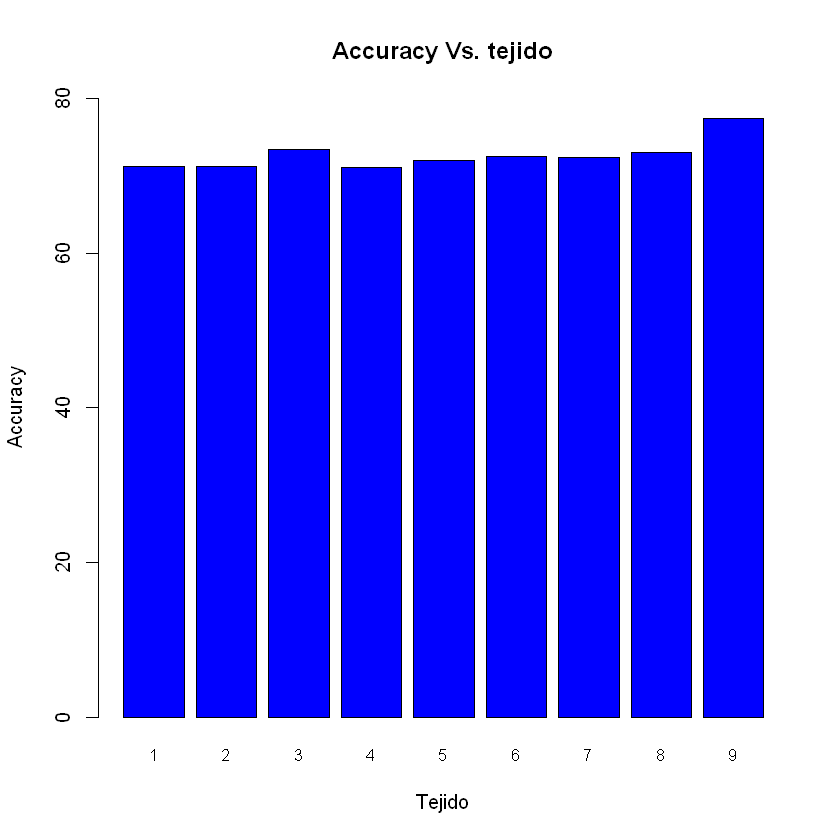

In [14]:
barplot(A,names.arg = 1:9,cex.names=0.8, ylab = "Accuracy", xlab="Tejido",col='blue',ylim=c(0,80),main="Accuracy Vs. tejido")

### KNN

In [17]:
## predicción sobre test con k=1
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 89  2  5  0  2  2  1  1  0
         2  1 89  4  4  4  8  4  0  0
         3  1  2 72  0 10  5  1 13  1
         4  0  2  0 98  0  0  5  0  0
         5  0  0  0  0 68  1  0  3  0
         6  0  7  4  0  2 85  2  3  0
         7  0  2  1  1  0  1 91  0  0
         8  0  0  7  0  6  4  0 86  0
         9  0  0  1  0  0  0  0  0 99

Overall Statistics
                                          
               Accuracy : 0.8633          
                 95% CI : (0.8391, 0.8851)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8462          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.97802  0.85577   0.7660   0.9515  0.73913  0.80189
Specificity           0.98393 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Cxcr1, X1700019O17Rik, Olfr12, Avpr1b, Tnn, X4930469G21Rik, Bc1, A930009A15Rik, X4932414J04Rik, Olfr1371, Olfr464, Mir1198, Calm5, X4930401O12Rik, X2410141K09Rik, A430090L17Rik, Sntn, Snord58b, Htr2a, X1700044C05Rik, X1700047G03Rik, Cdh18, X4930430F21Rik, Mir875, Gm19303, X1700065I16Rik, Dnajb7, Mir1249, Mir1941, Krt76, Sept12, Snora64, X4833427F10Rik, Tmem232, X1700011E24Rik, Fam69c, X4930526L06Rik, Tmc1, Scd3, X9030204H09Rik, X9430019J16Rik, Gm6793, Gm14461, BC125332, X4930412B13Rik, Tgm6, X9430021M05Rik, Wfdc15a, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Gm6260, X1700022I11Rik, Spag8, Ccin, Zkscan16, Foxe3, X1700125D06Rik, X1700021N21Rik, Gm438, Hes2, Mir3471.1, Pde6b, X1700018F24Rik, AA545190, Iqub, Gm6644, Svs1, Mir196b, X1700094M24Rik, Slc25a18, Ceacam9, B230206H07Rik, Olfr370, X1110028F18Rik, Tmem89, X4930593C16Rik, Gm14635, Akap14"Warning 

"These variables have zero variances: Cxcr1, X1700019O17Rik, Olfr12, Avpr1b, Tnn, X4930469G21Rik, Bc1, A930009A15Rik, X4932414J04Rik, Olfr1371, Olfr464, Mir1198, Calm5, X4930401O12Rik, X2410141K09Rik, A430090L17Rik, Sntn, Snord58b, Htr2a, X1700044C05Rik, X1700047G03Rik, Cdh18, X4930430F21Rik, Mir875, Gm19303, X1700065I16Rik, Dnajb7, Mir1249, Mir1941, Krt76, Sept12, Snora64, X4833427F10Rik, Tmem232, X1700011E24Rik, Fam69c, X4930526L06Rik, Tmc1, Scd3, X9030204H09Rik, X9430019J16Rik, Gm6793, Gm14461, BC125332, X4930412B13Rik, Tgm6, X9430021M05Rik, Wfdc15a, Tubb1, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Gm6260, X1700022I11Rik, Spag8, Ccin, Zkscan16, Foxe3, X1700125D06Rik, X1700021N21Rik, Gm438, Hes2, Mir3471.1, Pde6b, X1700018F24Rik, AA545190, Iqub, Gm6644, Svs1, Mir196b, X1700094M24Rik, Slc25a18, Ceacam9, B230206H07Rik, Olfr370, X1110028F18Rik, Tmem89, X4930593C16Rik, Gm14635, Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These v

"These variables have zero variances: Cxcr1, X1700019O17Rik, Olfr12, Avpr1b, Tnn, X4930469G21Rik, Aire, Bc1, Tmprss9, A930009A15Rik, X4932414J04Rik, Olfr1371, Olfr464, X1700106J16Rik, Mir1198, X1700001K19Rik, Calm5, X4930401O12Rik, X2410141K09Rik, A430090L17Rik, Sntn, Snord58b, Htr2a, X1700044C05Rik, X1700047G03Rik, X4930430F21Rik, Mir875, Gm19303, X1700065I16Rik, Dnajb7, Mir1249, Mir1941, Krt76, Sept12, Snora64, X4833427F10Rik, Tmem232, Fam69c, X4930526L06Rik, Tmc1, X1700061F12Rik, X9030204H09Rik, X9430019J16Rik, Gm6793, Gm14461, BC125332, X4930412B13Rik, Tgm6, X9430021M05Rik, Wfdc15a, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Gm6260, X1700022I11Rik, Spag8, Ccin, Zkscan16, Foxe3, Gm438, Mir3471.1, Pde6b, X1700018F24Rik, AA545190, Gm6644, Svs1, Mir196b, X1700094M24Rik, Ceacam9, Cldnd2, B230206H07Rik, Olfr370, X4930593C16Rik, Gm14635, Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Cxcr1, X17000

"These variables have zero variances: Cxcr1, X1700019O17Rik, Olfr12, Avpr1b, Tnn, X4930469G21Rik, Aire, Bc1, Tmprss9, A930009A15Rik, X4932414J04Rik, Olfr1371, Olfr464, X1700106J16Rik, Mir1198, X1700001K19Rik, Calm5, X4930401O12Rik, X2410141K09Rik, A430090L17Rik, Sntn, Snord58b, Htr2a, X1700044C05Rik, X1700047G03Rik, X4930430F21Rik, Mir875, Gm19303, X1700065I16Rik, Dnajb7, Mir1249, Mir1941, Krt76, Sept12, Snora64, X4833427F10Rik, Tmem232, Fam69c, X4930526L06Rik, Tmc1, X1700061F12Rik, X9030204H09Rik, X9430019J16Rik, Gm6793, Gm14461, BC125332, X4930412B13Rik, Tgm6, X9430021M05Rik, Wfdc15a, Birc7, Mir1905, Sprr3, Sprr4, X4933401H06Rik, Gm6260, X1700022I11Rik, Spag8, Ccin, Zkscan16, Foxe3, Gm438, Mir3471.1, Pde6b, X1700018F24Rik, AA545190, Gm6644, Svs1, Mir196b, X1700094M24Rik, Ceacam9, Cldnd2, B230206H07Rik, Olfr370, X4930593C16Rik, Gm14635, Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: Cxcr1, X17000

,k
2,3


ERROR: Error in confusionMatrix.default(as.factor(predd2), as.factor(df.test2$y)): the data cannot have more levels than the reference


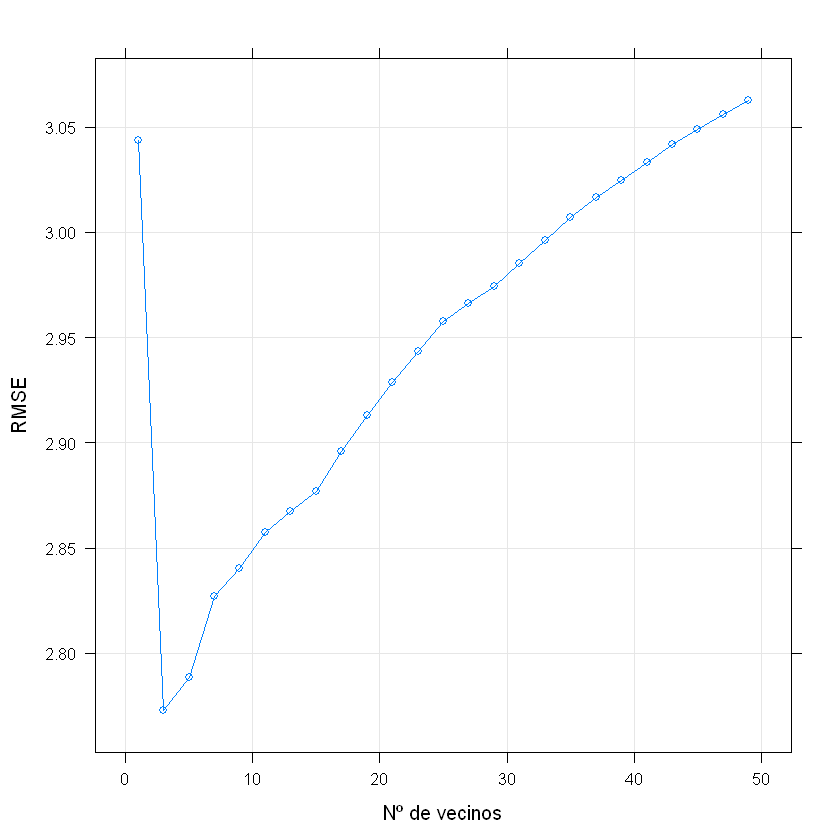

In [18]:
## búsqueda del k óptimo
trctrl=trainControl(method="cv", number=2) #divido mi train en 2, train y validation, de ahi saco mi model cv
knn.fit=train(y~.,df.train2, method="knn",trControl=trctrl, preProcess=c("center", "scale"), tuneGrid=expand.grid(k=seq(from = 1, to=50, by=2)))

plot(knn.fit, xlab="Nº de vecinos", ylab="RMSE")
knn.fit$bestTune
predd2 = predict(knn.fit, df.test2[,-ncol(df.test2)])
confusionMatrix(as.factor(predd2), as.factor(df.test2$y))

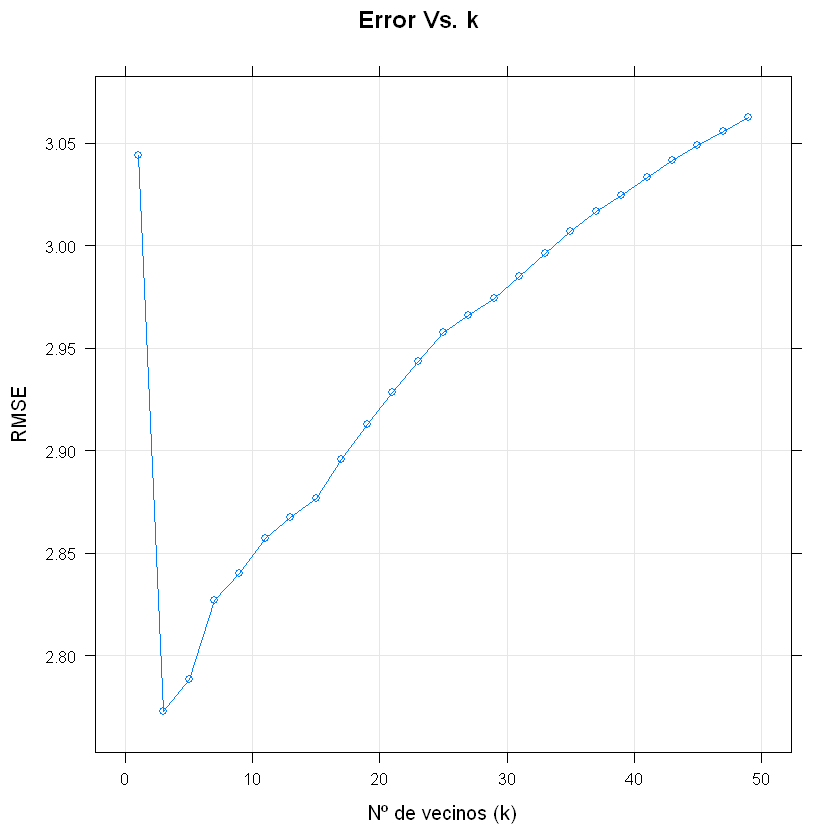

In [21]:
plot(knn.fit, xlab="Nº de vecinos (k)", ylab="RMSE", main="Error Vs. k")

In [19]:
## predicción sobre test con k óptimo (3)
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=3)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 89  2  3  0  2  2  2  1  0
         2  0 89  4  4  2  8  5  0  0
         3  1  3 76  0  8  4  1 15  3
         4  0  3  0 99  0  1  5  0  0
         5  0  0  0  0 70  3  0  1  0
         6  1  4  4  0  3 81  0  2  0
         7  0  3  1  0  1  0 91  0  0
         8  0  0  4  0  6  7  0 87  0
         9  0  0  2  0  0  0  0  0 97

Overall Statistics
                                          
               Accuracy : 0.8656          
                 95% CI : (0.8415, 0.8872)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8487          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.97802  0.85577  0.80851   0.9612  0.76087   0.7642
Specificity           0.98517 

### Árboles de clasifición

In [10]:
df.train3=df.train2*1
df.test3=df.test2*1
df.train3$y=as.factor(df.train3$y)
df.test3$y=as.factor(df.test3$y)

In [11]:
## árbol completo
t = tree(formula = y ~ ., data = df.train3, control=tree.control(nrow(df.train3),mincut=1,minsize=2,mindev=0) )

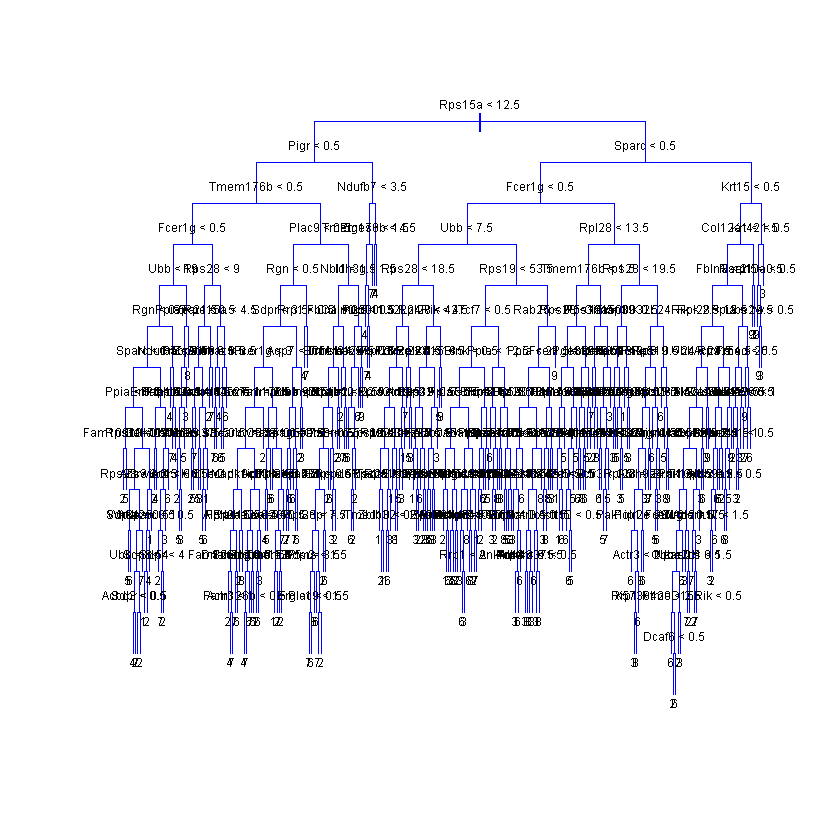

In [33]:
plot(t,type = "uniform",col="blue")
text(t, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

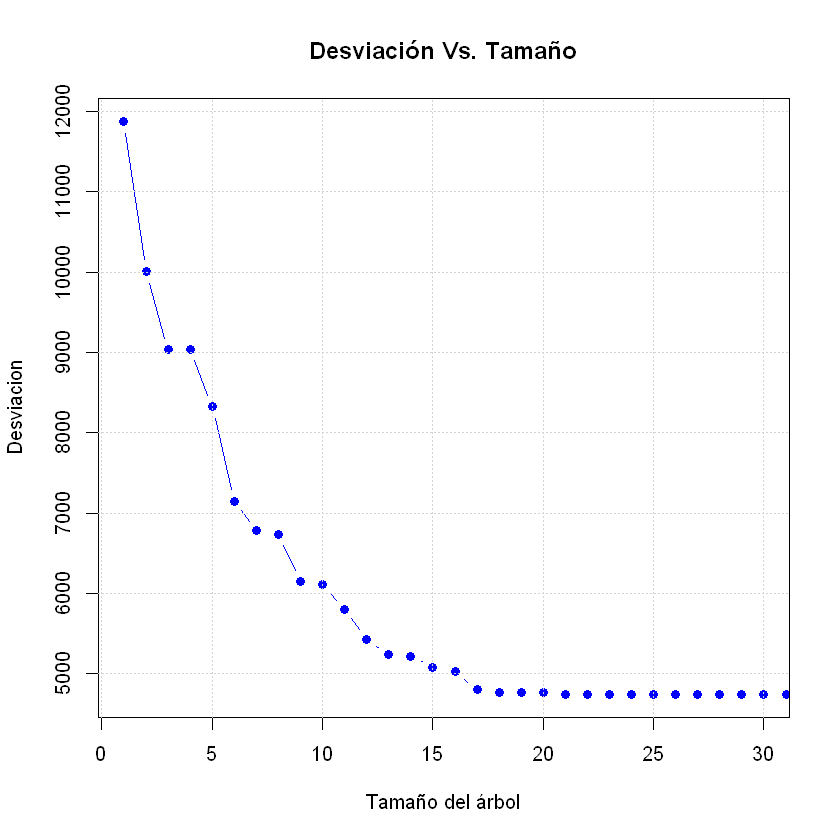

In [12]:
## búsqueda del tamaño de árbol óptimo
a=cv.tree(t, K = 10) #cross validation
plot(a$size,a$dev, xlab="Tamaño del árbol", main="Desviación Vs. Tamaño",ylab="Desviacion", type="b", col="blue", pch=19,xlim=c(1,30))
grid()

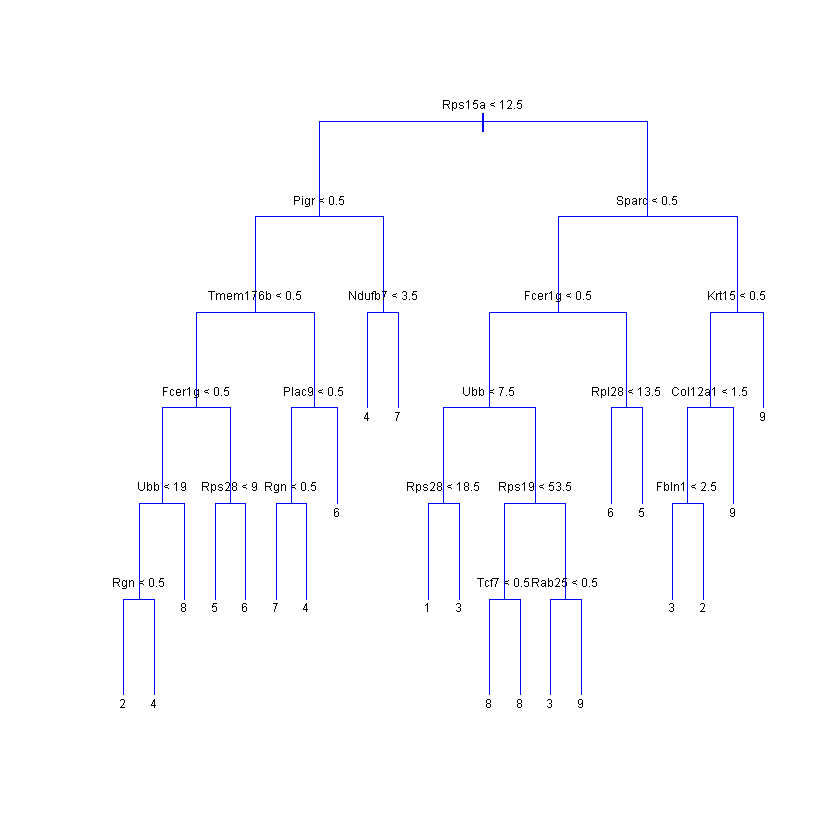

In [25]:
## podamos con tamaño óptimo
t.pruned=prune.tree(t, best = 22) #arbol podado
plot(t.pruned,type = "uniform",col="blue")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

In [26]:
#predicción sobre test
pred.test= predict(t.pruned, df.test3,type="class")
confusionMatrix(pred.test,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 77  2  0  0  0  0  0  2  0
         2  0 51  1  4  1  0  9  0  1
         3  1 14 76  0  2 20  0 15  9
         4  0  0  0 94  0  0  2  0  0
         5  2  1  1  1 73  9  1  4  2
         6  9 20  3  0  5 54 15  1  0
         7  1 11  1  4  1 16 76  1  0
         8  1  5 10  0 10  7  1 83  1
         9  0  0  2  0  0  0  0  0 87

Overall Statistics
                                          
               Accuracy : 0.7456          
                 95% CI : (0.7158, 0.7737)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7137          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.84615  0.49038  0.80851   0.9126  0.79348   0.5094
Specificity           0.99506 

### Random Forest


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 23

        OOB estimate of  error rate: 8.93%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 304   0   0   0   1   4   0   0   0  0.01618123
2  10 261   3   0   2  12   7   1   0  0.11824324
3   5  10 281   0   0   5   1   4   0  0.08169935
4   0   7   0 286   0   3   1   0   0  0.03703704
5   2   0   5   0 286   2   0  13   0  0.07142857
6   9  25  31   0   5 217   3   4   0  0.26190476
7   0  23   1   0   2  18 251   1   0  0.15202703
8   2   0   8   0   1   5   0 278   0  0.05442177
9   0   0   2   0   3   0   0   0 295  0.01666667

[1] 633 636

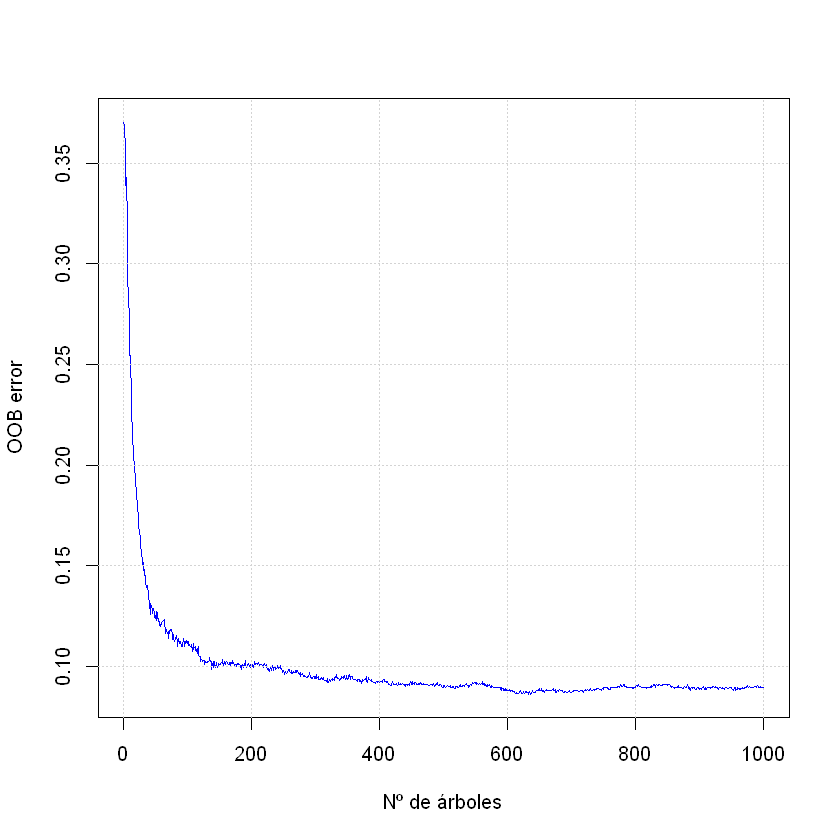

In [13]:
rf = randomForest(y ~., df.train3, ntree=1000)
rf
# OOB error
plot(rf$err.rate[, 1], type = "l", xlab = "Nº de árboles", col="blue",ylab = "OOB error")
grid()
# número óptimo de árboles 
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))
ntree

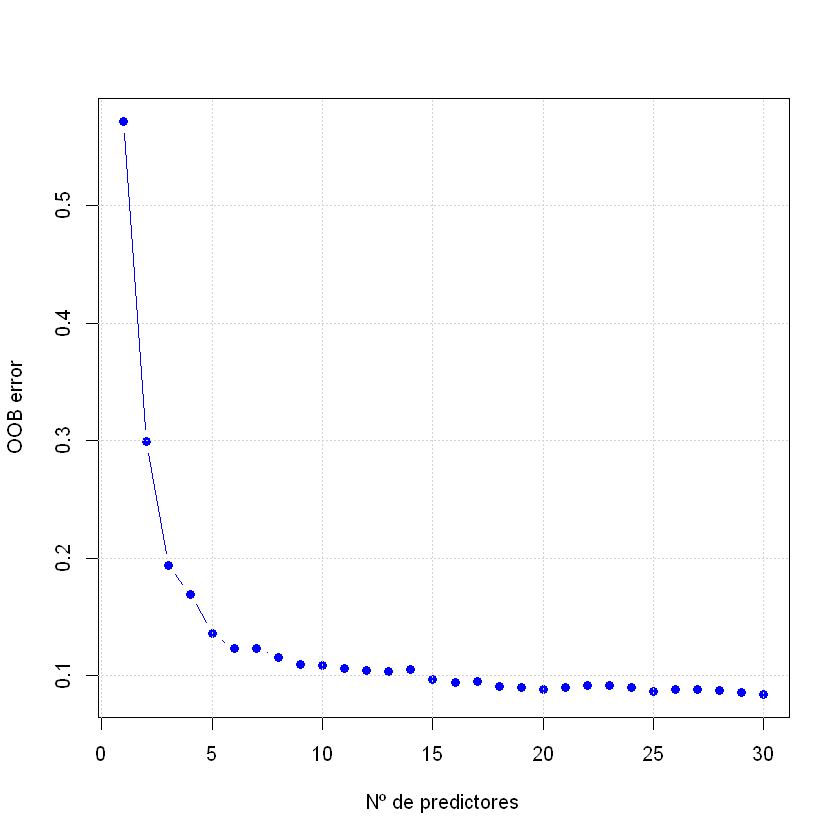

In [14]:
# búsqueda del número óptimo de predictores
err.oob = c()
for (mtry in 1:30) {
rf.mtry = randomForest(y ~., df.train3,ntree = ntree[1], mtry = mtry)
err.oob[mtry] = rf.mtry$err.rate[ntree[1], 1]
}

matplot(1:30 , err.oob, type = "b", pch = 19 ,lty = 1,col="blue",ylab = "OOB error", xlab = "Nº de predictores")
grid()

In [15]:
## modelo con parámetros óptimos
rf.occ = randomForest(y ~., df.train3, ntree = ntree[1], mtry = 25)
rf.occ
## predicción sobre test
pred.r = predict(rf.occ, df.test3)


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = ntree[1],      mtry = 25) 
               Type of random forest: classification
                     Number of trees: 633
No. of variables tried at each split: 25

        OOB estimate of  error rate: 8.89%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 305   0   0   0   0   4   0   0   0  0.01294498
2  11 258   3   0   1  13   9   1   0  0.12837838
3   6   9 280   0   1   4   1   4   1  0.08496732
4   1   6   0 286   0   4   0   0   0  0.03703704
5   2   0   3   0 289   2   1  11   0  0.06168831
6  11  21  30   0   5 222   2   3   0  0.24489796
7   0  20   1   0   3  20 251   1   0  0.15202703
8   3   0   9   0   1   7   0 274   0  0.06802721
9   0   1   1   0   3   0   0   0 295  0.01666667

In [19]:
confusionMatrix(pred.r,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  89   4   0   0   1   2   1   2   0
         2   0  92   5   3   0   6   8   0   0
         3   1   1  87   0   3  10   0   5   0
         4   0   0   0 100   0   0   0   0   0
         5   0   1   0   0  85   1   2   2   1
         6   1   2   2   0   2  83   3   2   0
         7   0   3   0   0   0   0  90   0   0
         8   0   1   0   0   1   4   0  95   0
         9   0   0   0   0   0   0   0   0  99

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.8906, 0.9289)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9             
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [20]:
importancia=rf.occ$importance
i<-data.frame(importancia)
i2=i[order(i,decreasing = TRUE),]
genes=labels(importancia)[[1]]
genes=genes[order(i,decreasing = TRUE)]
dd=data.frame(i2,genes)

In [21]:
dd[1:20,]

i2,genes
85.20225,Rps15a
83.97320,Rps19
82.37262,Rps28
75.70391,Ubb
74.56163,Rpl28
67.84299,Fcer1g
58.63161,Ppia
49.59269,Sparc
47.78447,Pabpc1
37.74687,Tcf7


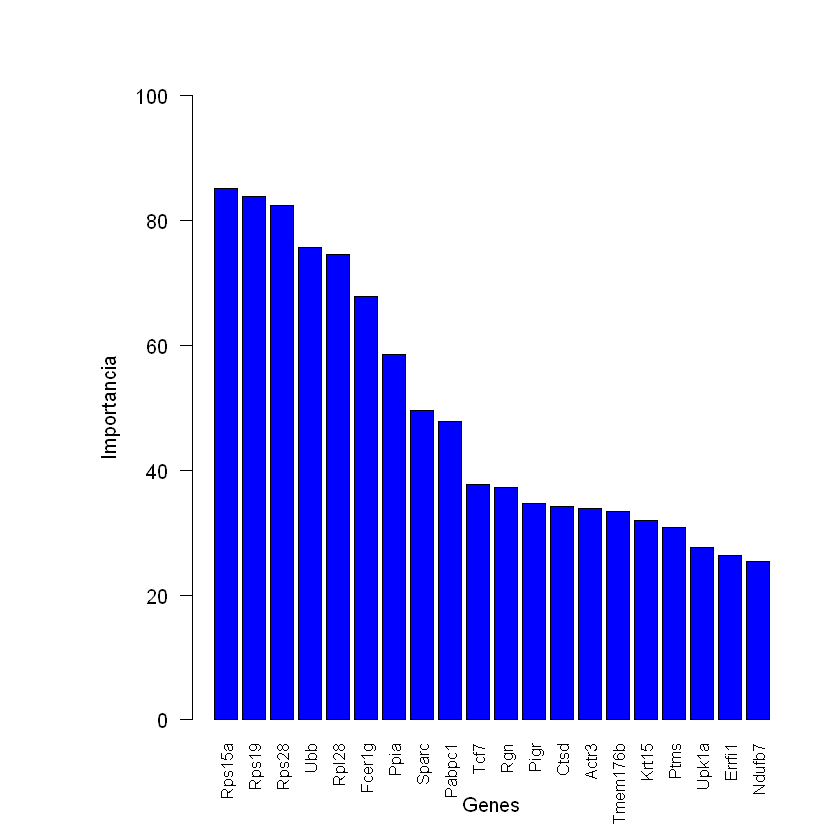

In [22]:
par(las=2) # make label text perpendicular to axis
par(mar=c(5,8,4,2)) # increase y-axis margin.
barplot(dd[1:20,1],names.arg = dd[1:20,2],cex.names=0.8, ylab = "Importancia", xlab="Genes",col="blue",ylim=c(0,100))